In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#lets make a list of categories.ie infected or non infected leaf
categories=list(os.listdir('/kaggle/input/corn-leaf-infection-dataset/Corn Disease detection'))

In [3]:
#now preprocess the data from the directory
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
dire='/kaggle/input/corn-leaf-infection-dataset/Corn Disease detection'
features=[]
IMG_SIZE=200
for i in categories:
    path=os.path.join(dire,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img))
            img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            features.append([img_array,num_classes])


In [4]:
#now separate the dependent and independent variables from the list
X=[]
Y=[]
for i ,j in features:
    X.append(i)
    Y.append(j)

In [5]:
x=np.array(X)/255

In [6]:
#lets reshape the x array to meet the keras requirement
x=x.reshape(-1,200,200,3)

In [7]:
x.shape

(4225, 200, 200, 3)

In [8]:
#we need to convert target lables into one hot encoding integers
from tensorflow.keras.utils import to_categorical
y=to_categorical(Y)

In [9]:
#now we have to split our data into train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=12,test_size=0.2)

In [10]:
# 数据增强
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2,
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
datagen.fit(x_train)

In [11]:
import tensorflow as tf 
import keras 
from keras.layers import Conv2D
from keras.models import Sequential
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import cv2
import re
import random
random.seed(0)
np.random.seed(0)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPool2D,Flatten,Dense,BatchNormalization,Dropout,Conv2D
model=Sequential([
    Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(200,200,3)),
    MaxPool2D((2,2)),
    
    Conv2D(128,(3,3),activation='relu'),
    MaxPool2D((3,3)),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(256,(3,3),padding='same',activation='relu'),
    MaxPool2D((3,3)),
    
    Conv2D(512,(3,3),activation='relu',padding='same'),
    MaxPool2D((2,2)),
    Dropout(0.3),
    BatchNormalization(),
    
    Flatten(),
    Dense(1024,activation='relu'),
    Dense(2,activation='sigmoid')
])
model.summary()
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 98, 98, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 256)       2

In [13]:
history=model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.3)

Epoch 1/100
74/74 [==============================] - 5s 69ms/step - loss: 0.4900 - acc: 0.8343 - val_loss: 11.5405 - val_acc: 0.4813
Epoch 2/100
74/74 [==============================] - 4s 48ms/step - loss: 0.2247 - acc: 0.9176 - val_loss: 14.2668 - val_acc: 0.4813
Epoch 3/100
74/74 [==============================] - 4s 50ms/step - loss: 0.1627 - acc: 0.9379 - val_loss: 12.0482 - val_acc: 0.4813
Epoch 4/100
74/74 [==============================] - 4s 47ms/step - loss: 0.1463 - acc: 0.9442 - val_loss: 4.1738 - val_acc: 0.4822
Epoch 5/100
74/74 [==============================] - 4s 48ms/step - loss: 0.1483 - acc: 0.9413 - val_loss: 9.4088 - val_acc: 0.4813
Epoch 6/100
74/74 [==============================] - 4s 48ms/step - loss: 0.1255 - acc: 0.9505 - val_loss: 8.8959 - val_acc: 0.4813
Epoch 7/100
74/74 [==============================] - 4s 48ms/step - loss: 0.1065 - acc: 0.9594 - val_loss: 1.1472 - val_acc: 0.7071
Epoch 8/100
74/74 [==============================] - 4s 48ms/step - loss:

In [14]:
model.save('./CornInfect.h5')

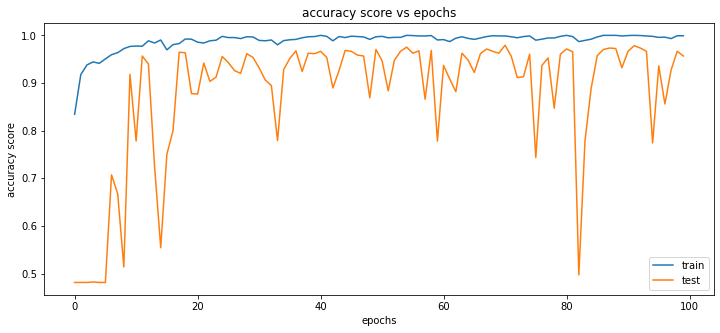

In [15]:
#plot the model results to evaluate better
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy score')
plt.title('accuracy score vs epochs')
plt.legend(['train','test'])
plt.show()

In [16]:
#there are many sharp peaks during the training phase but at the end it achieves a quite good accuracy 91 on test set

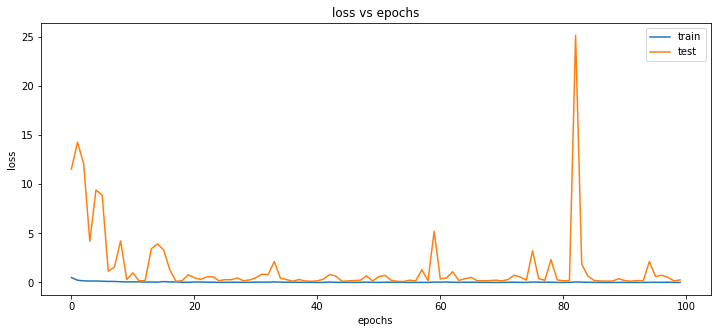

In [17]:
#plot the loss score of both test and train sets
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss vs epochs')
plt.legend(['train','test'])
plt.show()